In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split



In [13]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv(url, names=columns)



print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.15841

In [14]:
#Q1-3
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"
]

df = pd.read_csv(url, names=columns)


print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.15841

1. Define and describe a classification problem using the dataset.

This is a binary classification problem using the UCI Heart Disease dataset. We will train classifiers that can predict whether a patient has heart disease or not based on the input features. The features such as age, sex, blood pressure, cholesterol levels, chest pain type, and results from diagnostic tests. This dataset contains a target variable num with values ranging from 0 to 4, representing different heart disease degrees.(We might need transform the num variable into a binary outcome) target = 1 indicate presence of heart disease (original values 1 to 4) ， target = 0 means no heart disease.


2. Apply any chosen data transformations, or explain why no transformations were necessary.

We apply one-hot encoding to categorical variables with more than two classes. This allows classifiers to treat each category as a separate binary feature, which improves interpretability and model performance.

Standardization is necessary to numerical variables so that models like logistic regression are not biased by feature scale, which ensures that all features contribute equally to the model. It is very important for algorithms relying on distance metrics, such as k-nearest neighbors.


In [15]:
df = pd.read_csv(url, names=columns)
df.replace("?", np.nan, inplace=True)
df = df.apply(pd.to_numeric)
df.dropna(inplace=True)

df["target"] = df["num"].apply(lambda x: 1 if x > 0 else 0)
df.drop("num", axis=1, inplace=True)

categorical_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]
numerical_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

print("Transformed dataset shape:", df_encoded.shape)
print(df_encoded.head())


Transformed dataset shape: (297, 19)
        age  trestbps      chol   thalach   oldpeak        ca  target  \
0  0.936181  0.750380 -0.276443  0.017494  1.068965 -0.721976       0   
1  1.378929  1.596266  0.744555 -1.816334  0.381773  2.478425       1   
2  1.378929 -0.659431 -0.353500 -0.899420  1.326662  1.411625       1   
3 -1.941680 -0.095506  0.051047  1.633010  2.099753 -0.721976       0   
4 -1.498933 -0.095506 -0.835103  0.978071  0.295874 -0.721976       0   

   sex_1.0  cp_2.0  cp_3.0  cp_4.0  fbs_1.0  restecg_1.0  restecg_2.0  \
0     True   False   False   False     True        False         True   
1     True   False   False    True    False        False         True   
2     True   False   False    True    False        False         True   
3     True   False    True   False    False        False        False   
4    False    True   False   False    False        False         True   

   exang_1.0  slope_2.0  slope_3.0  thal_6.0  thal_7.0  
0      False      False     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB
None
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0

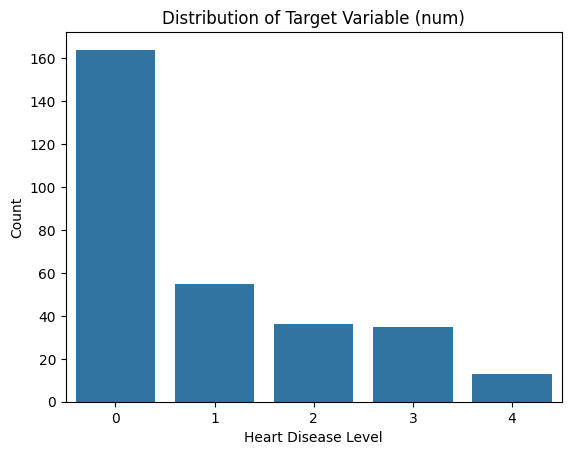

In [16]:
#3 
df_raw = pd.read_csv(url, names=columns)
print(df_raw.info())
print(df_raw.head())
print(df_raw['num'].value_counts())


sns.countplot(x="num", data=df_raw)
plt.title("Distribution of Target Variable (num)")
plt.xlabel("Heart Disease Level")
plt.ylabel("Count")
plt.show()